In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import time
import math as math
import seaborn as sns
sns.set()

# Small World Property and Divvy Bike Data

[[2. 1. 0. ... 0. 0. 0.]
 [1. 3. 0. ... 0. 0. 0.]
 [0. 1. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


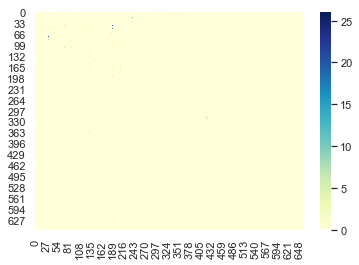

In [19]:
divvy_data = pd.read_csv('Divvy_Trips_2018_Q4_ids.csv')
start = np.array(divvy_data.iloc[:10000,0])
end = np.array(divvy_data.iloc[:10000,1])
start -= 2
end -= 2

num_stations = max(start)
num_trips = len(start)

weighted_graph_arr = np.zeros((num_stations + 1, num_stations + 1))
for i in range(num_trips):
    start_id = start[i]
    end_id = end[i]
    weighted_graph_arr[start_id, end_id] += 1
print(weighted_graph_arr)
np.savetxt("weighted_graph_arr.csv", weighted_graph_arr, delimiter=",")

ax = sns.heatmap(weighted_graph_arr, cmap="YlGnBu")
plt.show()

In [20]:
def binarize(weighted_graph):
    weighted_graph[weighted_graph > 0] = 1
    weighted_graph[weighted_graph <= 0] = 0
    return weighted_graph

unweighted_dir_arr = binarize(weighted_graph_arr)
print(np.where(np.sum(unweighted_dir_arr, axis = 0) == 0))
# print(np.sum(unweighted_dir_arr))

(array([  6,   8,  10,  61,  62,  63,  68,  76,  77,  80,  81,  93, 100,
       102, 103, 137, 149, 153, 185, 187, 219, 233, 250, 264, 267, 268,
       353, 355, 356, 359, 360, 361, 369, 370, 377, 378, 379, 382, 383,
       384, 385, 387, 389, 390, 391, 396, 398, 402, 405, 406, 407, 408,
       409, 410, 411, 419, 429, 431, 433, 437, 438, 440, 442, 444, 450,
       454, 466, 471, 507, 508, 510, 511, 512, 514, 515, 517, 519, 522,
       523, 524, 527, 531, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
       558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 569, 571, 572,
       573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585,
       586, 588, 591, 592, 593, 597, 604, 605, 606, 607, 608, 609, 610,
       611, 612, 613, 614, 615, 616, 617, 627, 628, 630, 631, 632, 638,
       639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651,
       652, 653, 654, 656]),)


In [22]:
# 1. use networkx to create unweighted directed graph
# 2. use networkx to create weighted directed graph
# 3. analyze clustering and mean path length
# 4. analyze small world and work on clustering visualization

# creates unweighted directed graph object
def create_graph_uw(unw_dir_arr):
    unweighted_dir_graph = nx.DiGraph()
    n_station = unw_dir_arr.shape[0]
    for i in range(n_station):
        for j in range(n_station):
            if(unw_dir_arr[i][j] == 1):
                unweighted_dir_graph.add_edge(i,j)
    return unweighted_dir_graph

unweighted_dir_graph_1 = create_graph_uw(unweighted_dir_arr)
# nx.draw_circular(unweighted_dir_graph_1, with_labels = True)

def create_graph_w(w_dir_arr):
    weighted_dir_graph = nx.DiGraph()
    n_station = w_dir_arr.shape[0]
    for i in range(n_station):
        for j in range(n_station):
            if(w_dir_arr[i][j] > 0):
                weighted_dir_graph.add_edge(i,j,w_dir_arr[i][j])
    return weighted_dir_graph



/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


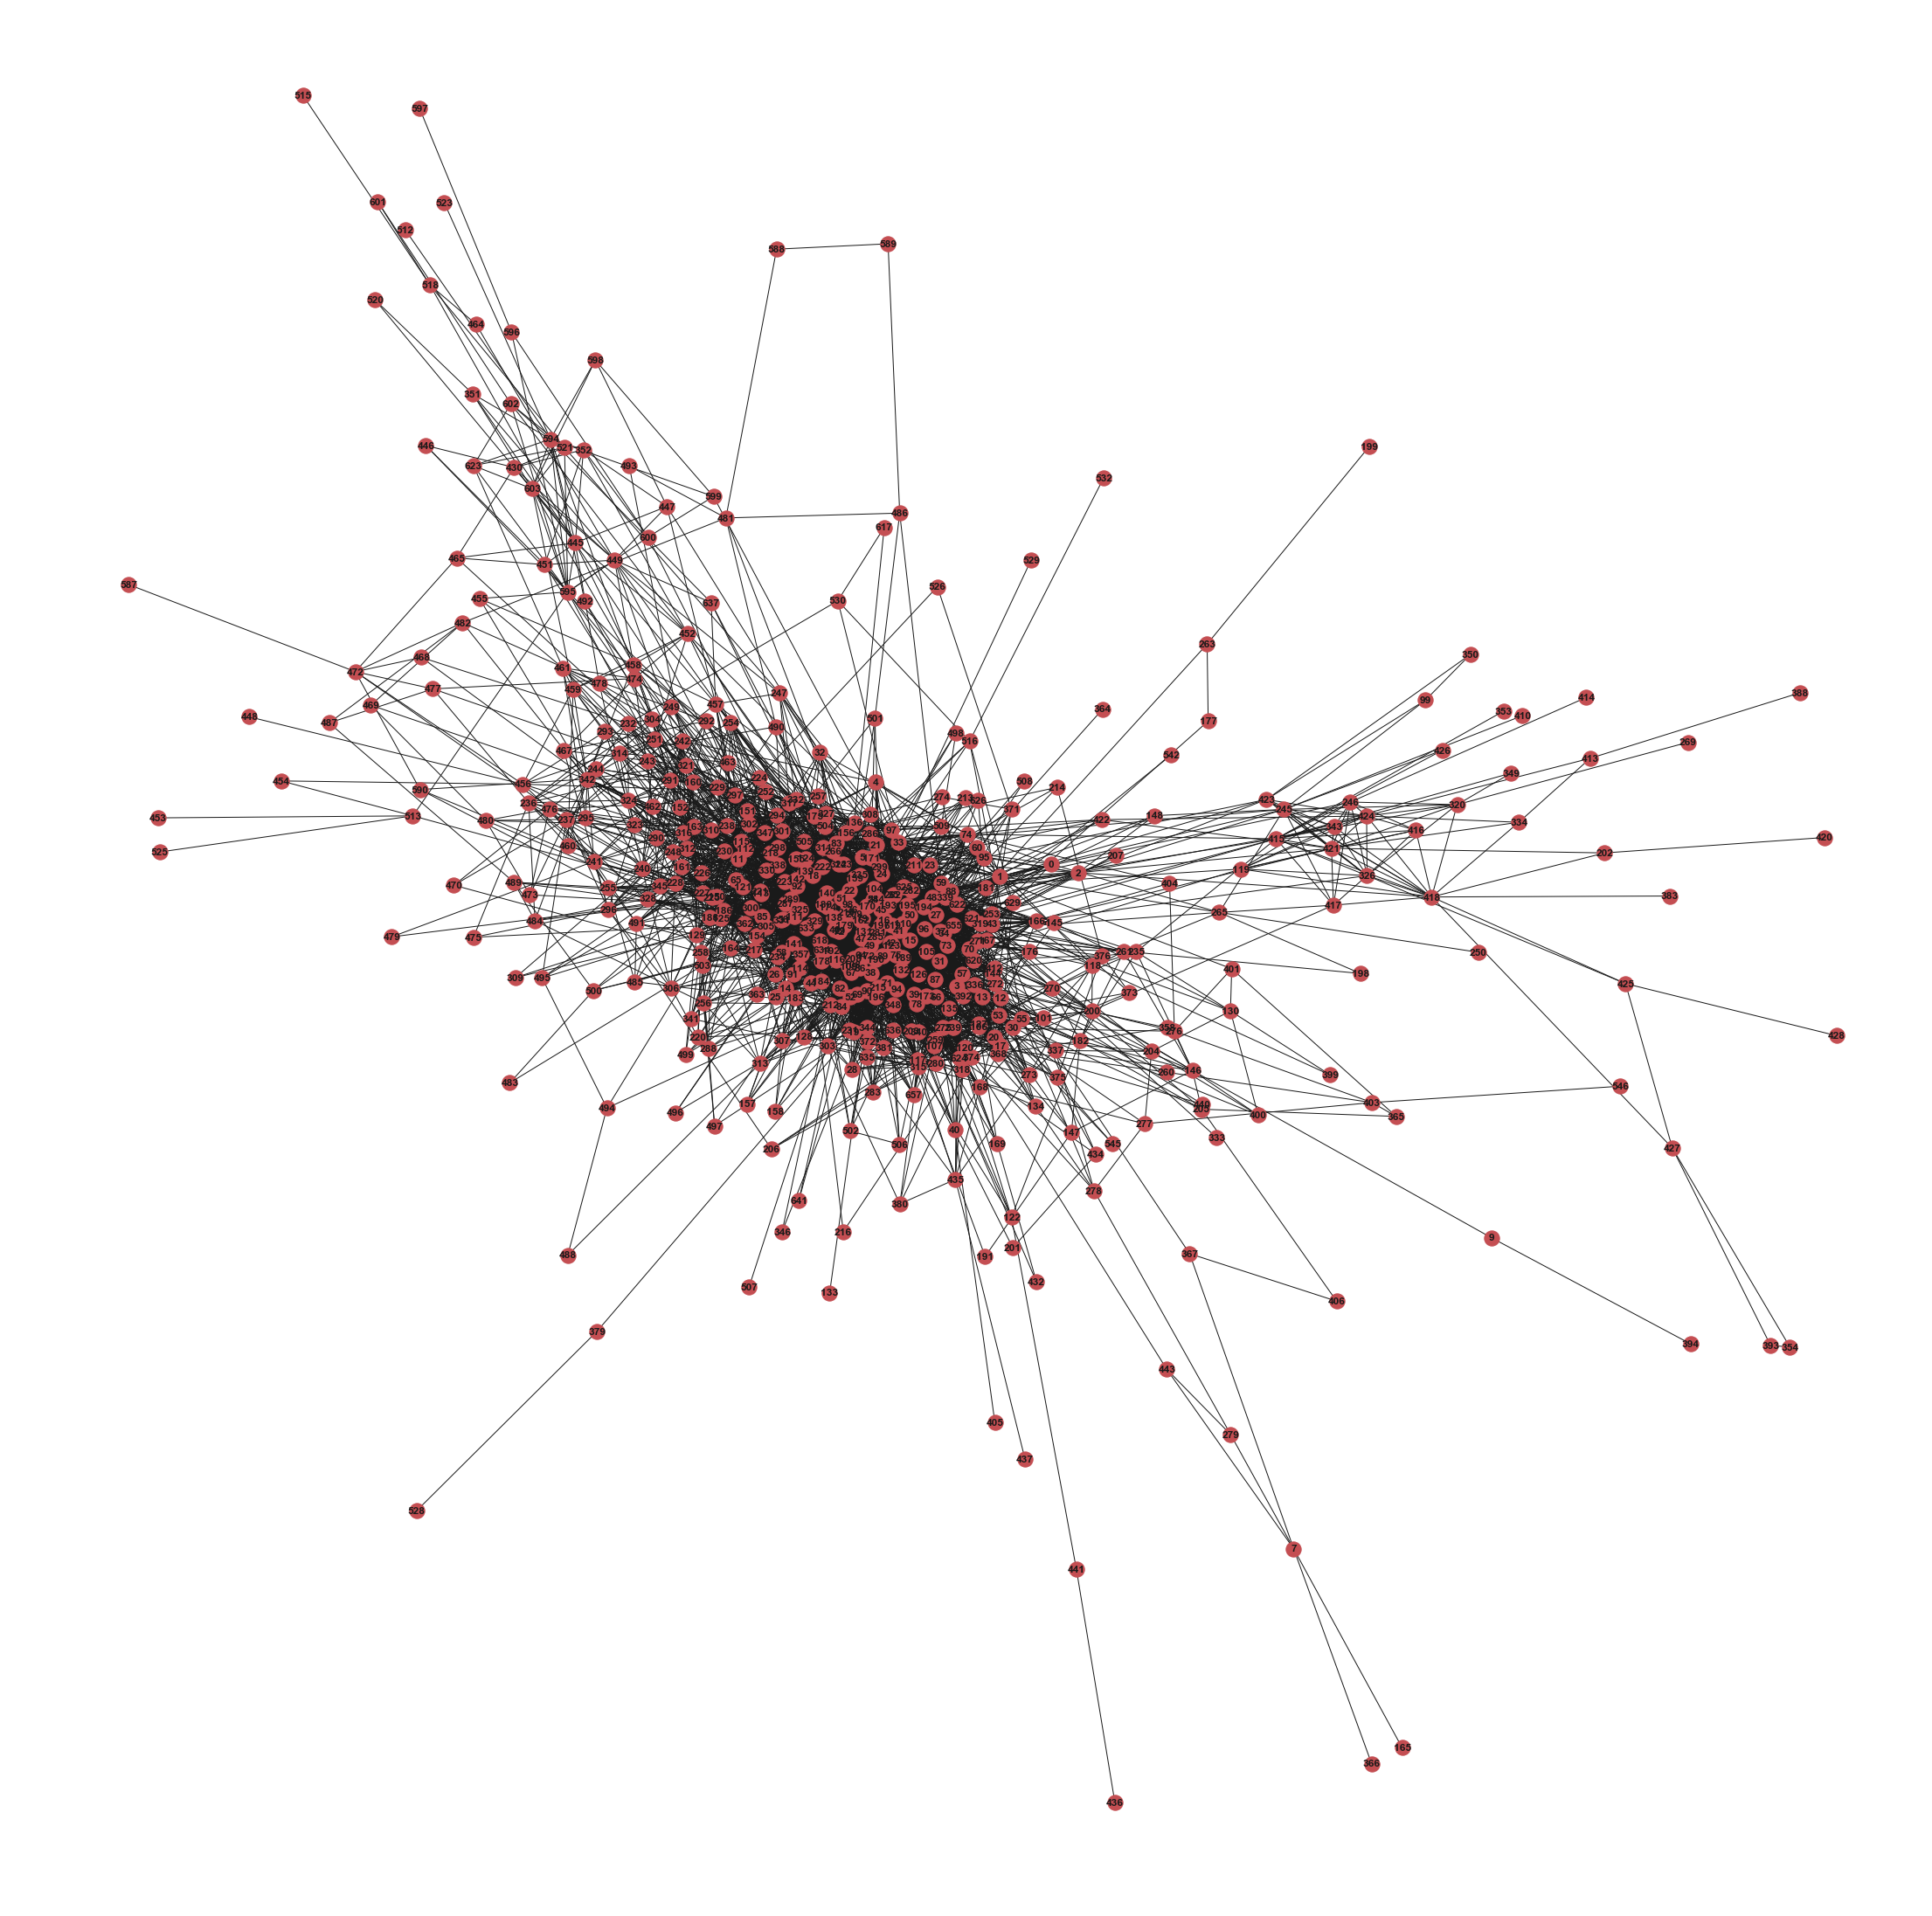

In [23]:
# for C in nx.connected_component_subgraphs(unweighted_dir_graph_1.to_undirected()):
#     print(nx.average_clustering(C))
    
# for C in nx.connected_component_subgraphs(unweighted_dir_graph_1.to_undirected()):
#     print(nx.average_shortest_path_length(C))
plt.rcParams["figure.figsize"] = (30,30)
# nx.clustering(unweighted_dir_graph_1)

unweighted_undir_graph_1 = unweighted_dir_graph_1.to_undirected()
largest_cc = unweighted_undir_graph_1.subgraph(max(nx.connected_components(unweighted_undir_graph_1), key=len))
nx.draw(largest_cc, with_labels=True, font_weight='bold')
plt.show()

## Graph Theory Definitions
- Clustering: the proportion of edges $e_i$ that exist between the neighbors of a particular node $i$ relative to the total number of possible edges between neighbors
    - $C_i = \dfrac{2e_i}{k_i(k_i - 1)}$
    - The overall clustering in a network can be determined by averaging the clustering across all individual nodes
- Path length: measure of the distance between nodes in the network, calculated as the mean of the shortest geodesic distances $d_{ij}$ between all possible node pairs
    - $L = \dfrac{1}{N(N-1)}\sum_{ifn, i\ne j}d_{ij}$
- Short path length is a characteristic of random graphs, while high clustering is a property of lattice networks

In [24]:
avg_clust = nx.average_clustering(largest_cc)
avg_path_len = nx.average_shortest_path_length(largest_cc)
print(avg_clust)
print(avg_path_len)

0.24061753464121455
2.904729582313156


In [7]:
import random as random

def random_reference(G, niter=1, connectivity=True, seed=None):
    """Compute a random graph by swapping edges of a given graph.

    Parameters
    ----------
    G : graph
        An undirected graph with 4 or more nodes.

    niter : integer (optional, default=1)
        An edge is rewired approximately `niter` times.

    connectivity : boolean (optional, default=True)
        When True, ensure connectivity for the randomized graph.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : graph
        The randomized graph.

    Notes
    -----
    The implementation is adapted from the algorithm by Maslov and Sneppen
    (2002) [1]_.

    References
    ----------
    .. [1] Maslov, Sergei, and Kim Sneppen.
           "Specificity and stability in topology of protein networks."
           Science 296.5569 (2002): 910-913.
    """
    if G.is_directed():
        msg = "random_reference() not defined for directed graphs."
        raise nx.NetworkXError(msg)
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")

    from networkx.utils import cumulative_distribution, discrete_sequence
    local_conn = nx.connectivity.local_edge_connectivity

    G = G.copy()
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    nnodes = len(G)
    nedges = nx.number_of_edges(G)
    niter = niter*nedges
    ntries = int(nnodes*nedges/(nnodes*(nnodes-1)/2))
    swapcount = 0

    for i in range(niter):
        n = 0
        while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf, seed=seed)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = random.choice(list(G.neighbors(a)))
            d = random.choice(list(G.neighbors(c)))
            bi = keys.index(b)
            di = keys.index(d)
            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                G.add_edge(a, d)
                G.add_edge(c, b)
                G.remove_edge(a, b)
                G.remove_edge(c, d)

                # Check if the graph is still connected
                if connectivity and local_conn(G, a, b) == 0:
                    # Not connected, revert the swap
                    G.remove_edge(a, d)
                    G.remove_edge(c, b)
                    G.add_edge(a, b)
                    G.add_edge(c, d)
                else:
                    swapcount += 1
                    break
            n += 1
    return G


def lattice_reference(G, niter=1, D=None, connectivity=True, seed=None):
    """Latticize the given graph by swapping edges.

    Parameters
    ----------
    G : graph
        An undirected graph with 4 or more nodes.

    niter : integer (optional, default=1)
        An edge is rewired approximatively niter times.

    D : numpy.array (optional, default=None)
        Distance to the diagonal matrix.

    connectivity : boolean (optional, default=True)
        Ensure connectivity for the latticized graph when set to True.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : graph
        The latticized graph.

    Notes
    -----
    The implementation is adapted from the algorithm by Sporns et al. [1]_.
    which is inspired from the original work by Maslov and Sneppen(2002) [2]_.

    References
    ----------
    .. [1] Sporns, Olaf, and Jonathan D. Zwi.
       "The small world of the cerebral cortex."
       Neuroinformatics 2.2 (2004): 145-162.
    .. [2] Maslov, Sergei, and Kim Sneppen.
       "Specificity and stability in topology of protein networks."
       Science 296.5569 (2002): 910-913.
    """
    import numpy as np
    from networkx.utils import cumulative_distribution, discrete_sequence
    local_conn = nx.connectivity.local_edge_connectivity

    if G.is_directed():
        msg = "lattice_reference() not defined for directed graphs."
        raise nx.NetworkXError(msg)
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")
    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    G = G.copy()
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = cumulative_distribution(degrees)  # cdf of degree

    nnodes = len(G)
    nedges = nx.number_of_edges(G)
    if D is None:
        D = np.zeros((nnodes, nnodes))
        un = np.arange(1, nnodes)
        um = np.arange(nnodes - 1, 0, -1)
        u = np.append((0,), np.where(un < um, un, um))

        for v in range(int(np.ceil(nnodes / 2))):
            D[nnodes - v - 1, :] = np.append(u[v + 1:], u[:v + 1])
            D[v, :] = D[nnodes - v - 1, :][::-1]

    niter = niter*nedges
    ntries = int(nnodes * nedges / (nnodes * (nnodes - 1) / 2))
    swapcount = 0

    for i in range(niter):
        n = 0
        while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf, seed=seed)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = random.choice(list(G.neighbors(a)))
            d = random.choice(list(G.neighbors(c)))
            bi = keys.index(b)
            di = keys.index(d)

            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                if D[ai, bi] + D[ci, di] >= D[ai, ci] + D[bi, di]:
                    # only swap if we get closer to the diagonal
                    G.add_edge(a, d)
                    G.add_edge(c, b)
                    G.remove_edge(a, b)
                    G.remove_edge(c, d)

                    # Check if the graph is still connected
                    if connectivity and local_conn(G, a, b) == 0:
                        # Not connected, revert the swap
                        G.remove_edge(a, d)
                        G.remove_edge(c, b)
                        G.add_edge(a, b)
                        G.add_edge(c, d)
                    else:
                        swapcount += 1
                        break
            n += 1

    return G

Lr = nx.average_shortest_path_length(random_reference(largest_cc))
Cl = nx.average_clustering(lattice_reference(largest_cc))
print(Lr)
print(Cl)



2.4289108142832903
0.17683150723731395


The following measures of $\omega$ and $\sigma$ are quantifications of the small world property. However, $\omega = \dfrac{L_{rand}}{L} - \dfrac{C}{C_{latt}}$ is a more accurate measurement of the small-world property of a network compared to $\sigma = \dfrac{\dfrac{C}{C_{rand}}}{\dfrac{L}{L_{rand}}}$
The value for sigma indicates a small world behavior of the divvy bike trip data (>1), while the value for omega does not indicate small world behavior (< 0).

In [10]:
print((Lr/avg_path_len) - (avg_clust/Cl))

-0.5245246991919614


In [13]:
print((avg_clust/Cl)/(avg_path_len/Lr))

1.1378197944605057


In [11]:
# Currently the function motif_adjacency_1 searches for FI/ 2x MM motif
# Can change search methods to feed-forward, FI/FO/MM motif or other motifs, but may be 
# significantly more complex to search

def motif_adjacency_1(dir_graph_arr):
    nrow = dir_graph_arr.shape[0]
    ncol = dir_graph_arr.shape[1]
    W_m = np.zeros(dir_graph_arr.shape)
    motif_node_list = [] # will store distinct node triplets of the motif instances
    for i in range(nrow):
        for j in range(i+1,nrow):
            if i != j:
                if dir_graph_arr[i][j] == 1 and dir_graph_arr[j][i] == 1:
                    for k in range(ncol):
                        if (k != i and k != j):
                            if (dir_graph_arr[i][k] == 1 and dir_graph_arr[j][k] == 1):
                                new_motif = (i, j, k)
                                motif_node_list.append(new_motif)
                                W_m[i][j] += 1
                                W_m[j][i] += 1
                                
                                W_m[i][k] += 1
                                W_m[k][i] += 1
                                
                                W_m[j][k] += 1
                                W_m[k][j] += 1
    return W_m, motif_node_list

test_1 = np.array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                   [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
                   [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
MA_1, node_list = motif_adjacency_1(test_1)
print(MA_1)
print(node_list)


def compute_laplacian(motif_adjacency):
    nrow = motif_adjacency.shape[0]
    ncol = motif_adjacency.shape[1]
    col_sum = np.sum(motif_adjacency, axis = 0)
    D = col_sum
    D_inv_sqrt = np.diag(np.power(D,-0.5))
    D = np.diag(D)
    L_m = np.dot(D_inv_sqrt, np.dot((D - motif_adjacency), D_inv_sqrt))
    return L_m

D_inv_sqrt = np.diag(np.power(np.sum(MA_1, axis = 0), -0.5))
Lap = compute_laplacian(MA_1)
val, vec = np.linalg.eig(Lap)

print(np.argsort(val))
z = vec[:, np.argsort(val)[1]]
print(z)

sig_val = np.dot(D_inv_sqrt, z)
print(sig_val)

print(np.argsort(sig_val))


def compute_sigma(motif_adjacency):
    nrow = motif_adjacency.shape[0]
    ncol = motif_adjacency.shape[1]
    col_sum = np.sum(motif_adjacency, axis = 0)
    D = col_sum
    D_inv_sqrt = np.diag(np.power(D,-0.5))
    L_m = np.dot(D_inv_sqrt, np.dot((np.diag(D) - motif_adjacency), D_inv_sqrt))
    L_m[np.isnan(L_m)] = 0
    L_m[np.isinf(L_m)] = 0
    val, vec = np.linalg.eig(L_m)
    index = np.argsort(val) # sorting the eigenvalues in increasing order
    z_idx = index[1]
    z = vec[:, z_idx]

    sigma_vals = np.dot(D_inv_sqrt, z)
    sigma_i = np.argsort(sigma_vals)
    return sigma_i
    


[[0. 3. 1. 1. 1. 0. 0. 0. 0. 0.]
 [3. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 2. 1.]
 [0. 0. 0. 0. 0. 1. 0. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]
[(0, 1, 2), (0, 1, 3), (0, 1, 4), (5, 6, 1), (7, 8, 5), (7, 8, 9)]
[0 1 2 8 6 3 9 5 7 4]
[-0.37202005 -0.33065014 -0.21478587 -0.21478587 -0.21478587  0.19140152
 -0.01694265  0.46760991  0.46760991  0.373675  ]
[-0.15187655 -0.11690248 -0.15187655 -0.15187655 -0.15187655  0.09570076
 -0.01198027  0.23380495  0.23380495  0.26422813]
[3 0 2 4 1 6 5 7 8 9]


In [12]:
def min_conductance(S_r, node_list):
    num_vals = S_r.size
    conductance = np.full(num_vals, 1, dtype = float)
    for i in range(3, num_vals):
        S = S_r[:i]
        S_bar = S[i:]
        cut = 0
        S_vol = 0
        S_bar_vol = 0
        unique_nodes = []
        for motif in node_list:
            
            num_S = 0
            num_S_bar = 0
            for node in motif:
                unique_nodes.append(node)
                if node in S:
                    num_S += 1
                else:
                    num_S_bar += 1
            
            if num_S > 0 and num_S_bar > 0:
                cut += 1
        unique_nodes = np.unique(np.array(unique_nodes))
        for node in unique_nodes:
            if node in S:
                S_vol += 1
            else:
                S_bar_vol += 1
        if S_vol > 0 and S_bar_vol > 0:
            conductance[i-1] = cut/(min(S_vol, S_bar_vol))
    return conductance

S_r_1 = np.array([3, 4, 0, 2, 1, 6, 5, 8, 7, 9])
conductance = min_conductance(S_r_1, node_list)
print(conductance)

print(min_conductance(compute_sigma(MA_1), node_list))

[1.         1.         1.         0.75       0.2        0.25
 0.33333333 1.         1.         1.        ]
[1.         1.         1.         0.75       0.2        0.25
 0.33333333 1.         1.         1.        ]


In [13]:
S_r_1 = np.array([3, 4, 0, 2, 1, 6, 5, 8, 7, 9])

num_vals = S_r_1.size
conductance = np.full(num_vals, 1)

S = S_r_1[:8]
S_bar = S_r_1[8:]

cut = 0
S_vol = 0
S_bar_vol = 0
unique_nodes = []

for motif in node_list:
    num_S = 0
    num_S_bar = 0
    for node in motif:
        unique_nodes.append(node)
        if node in S:
            num_S += 1
        else:
            num_S_bar += 1

    if num_S > 0 and num_S_bar > 0:
        cut += 1
print(unique_nodes)
unique_nodes = np.unique(np.array(unique_nodes))
for node in unique_nodes:
    if node in S:
        S_vol += 1
    else:
        S_bar_vol += 1
        
print(unique_nodes)
print(cut)
print(S_vol)
print(S_bar_vol)
print(cut/min(S_vol, S_bar_vol))

[0, 1, 2, 0, 1, 3, 0, 1, 4, 5, 6, 1, 7, 8, 5, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]
2
8
2
1.0


In [27]:
wm, nl = motif_adjacency_1(unweighted_dir_arr)
# print(nl)
print(compute_sigma(wm))
celegans_conductance = min_conductance(compute_sigma(wm), nl)
print(celegans_conductance)

S_min = compute_sigma(wm)[:np.argsort(celegans_conductance)[0]]
print(S_min[:20])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in power


[  0 602 262 603 259 258 257 254 253 600 252 249 248 247 246 245 244 241
 240 251 266 270 271 290 289 288 287 286 285 284 283 282 281 280 594 278
 595 596 275 274 273 272 239 238 237 236 203 619 620 200 621 622 197 196
 195 194 193 192 623 190 189 188 624 186 625 618 291 208 210 235 234 232
 231 230 229 228 227 226 225 224 223 222 218 217 215 213 212 211 209 184
 294 296 423 421 418 417 416 415 412 392 424 381 372 371 368 363 362 357
 352 349 374 430 521 445 480 489 491 476 473 470 500 463 462 461 460 459
 458 457 503 504 505 452 449 348 347 345 344 316 315 314 313 312 311 310
 308 307 306 305 304 303 302 301 300 299 298 297 317 295 318 320 343 342
 341 340 339 338 336 335 332 331 330 329 327 326 325 324 323 322 321 319
 182 242 180  74  73  72  71  70  69  67  66  65  64  60  59  58  57  56
  55  54 181  53  75  52  78  82 106 105 104 101  98  97  96  95  94  92
  91  90  89  88  87  86  85  84  83  79  51  50  49  23  22  21  20  19
  18  17  16  15  14  13  12  11 655   5   4   3   

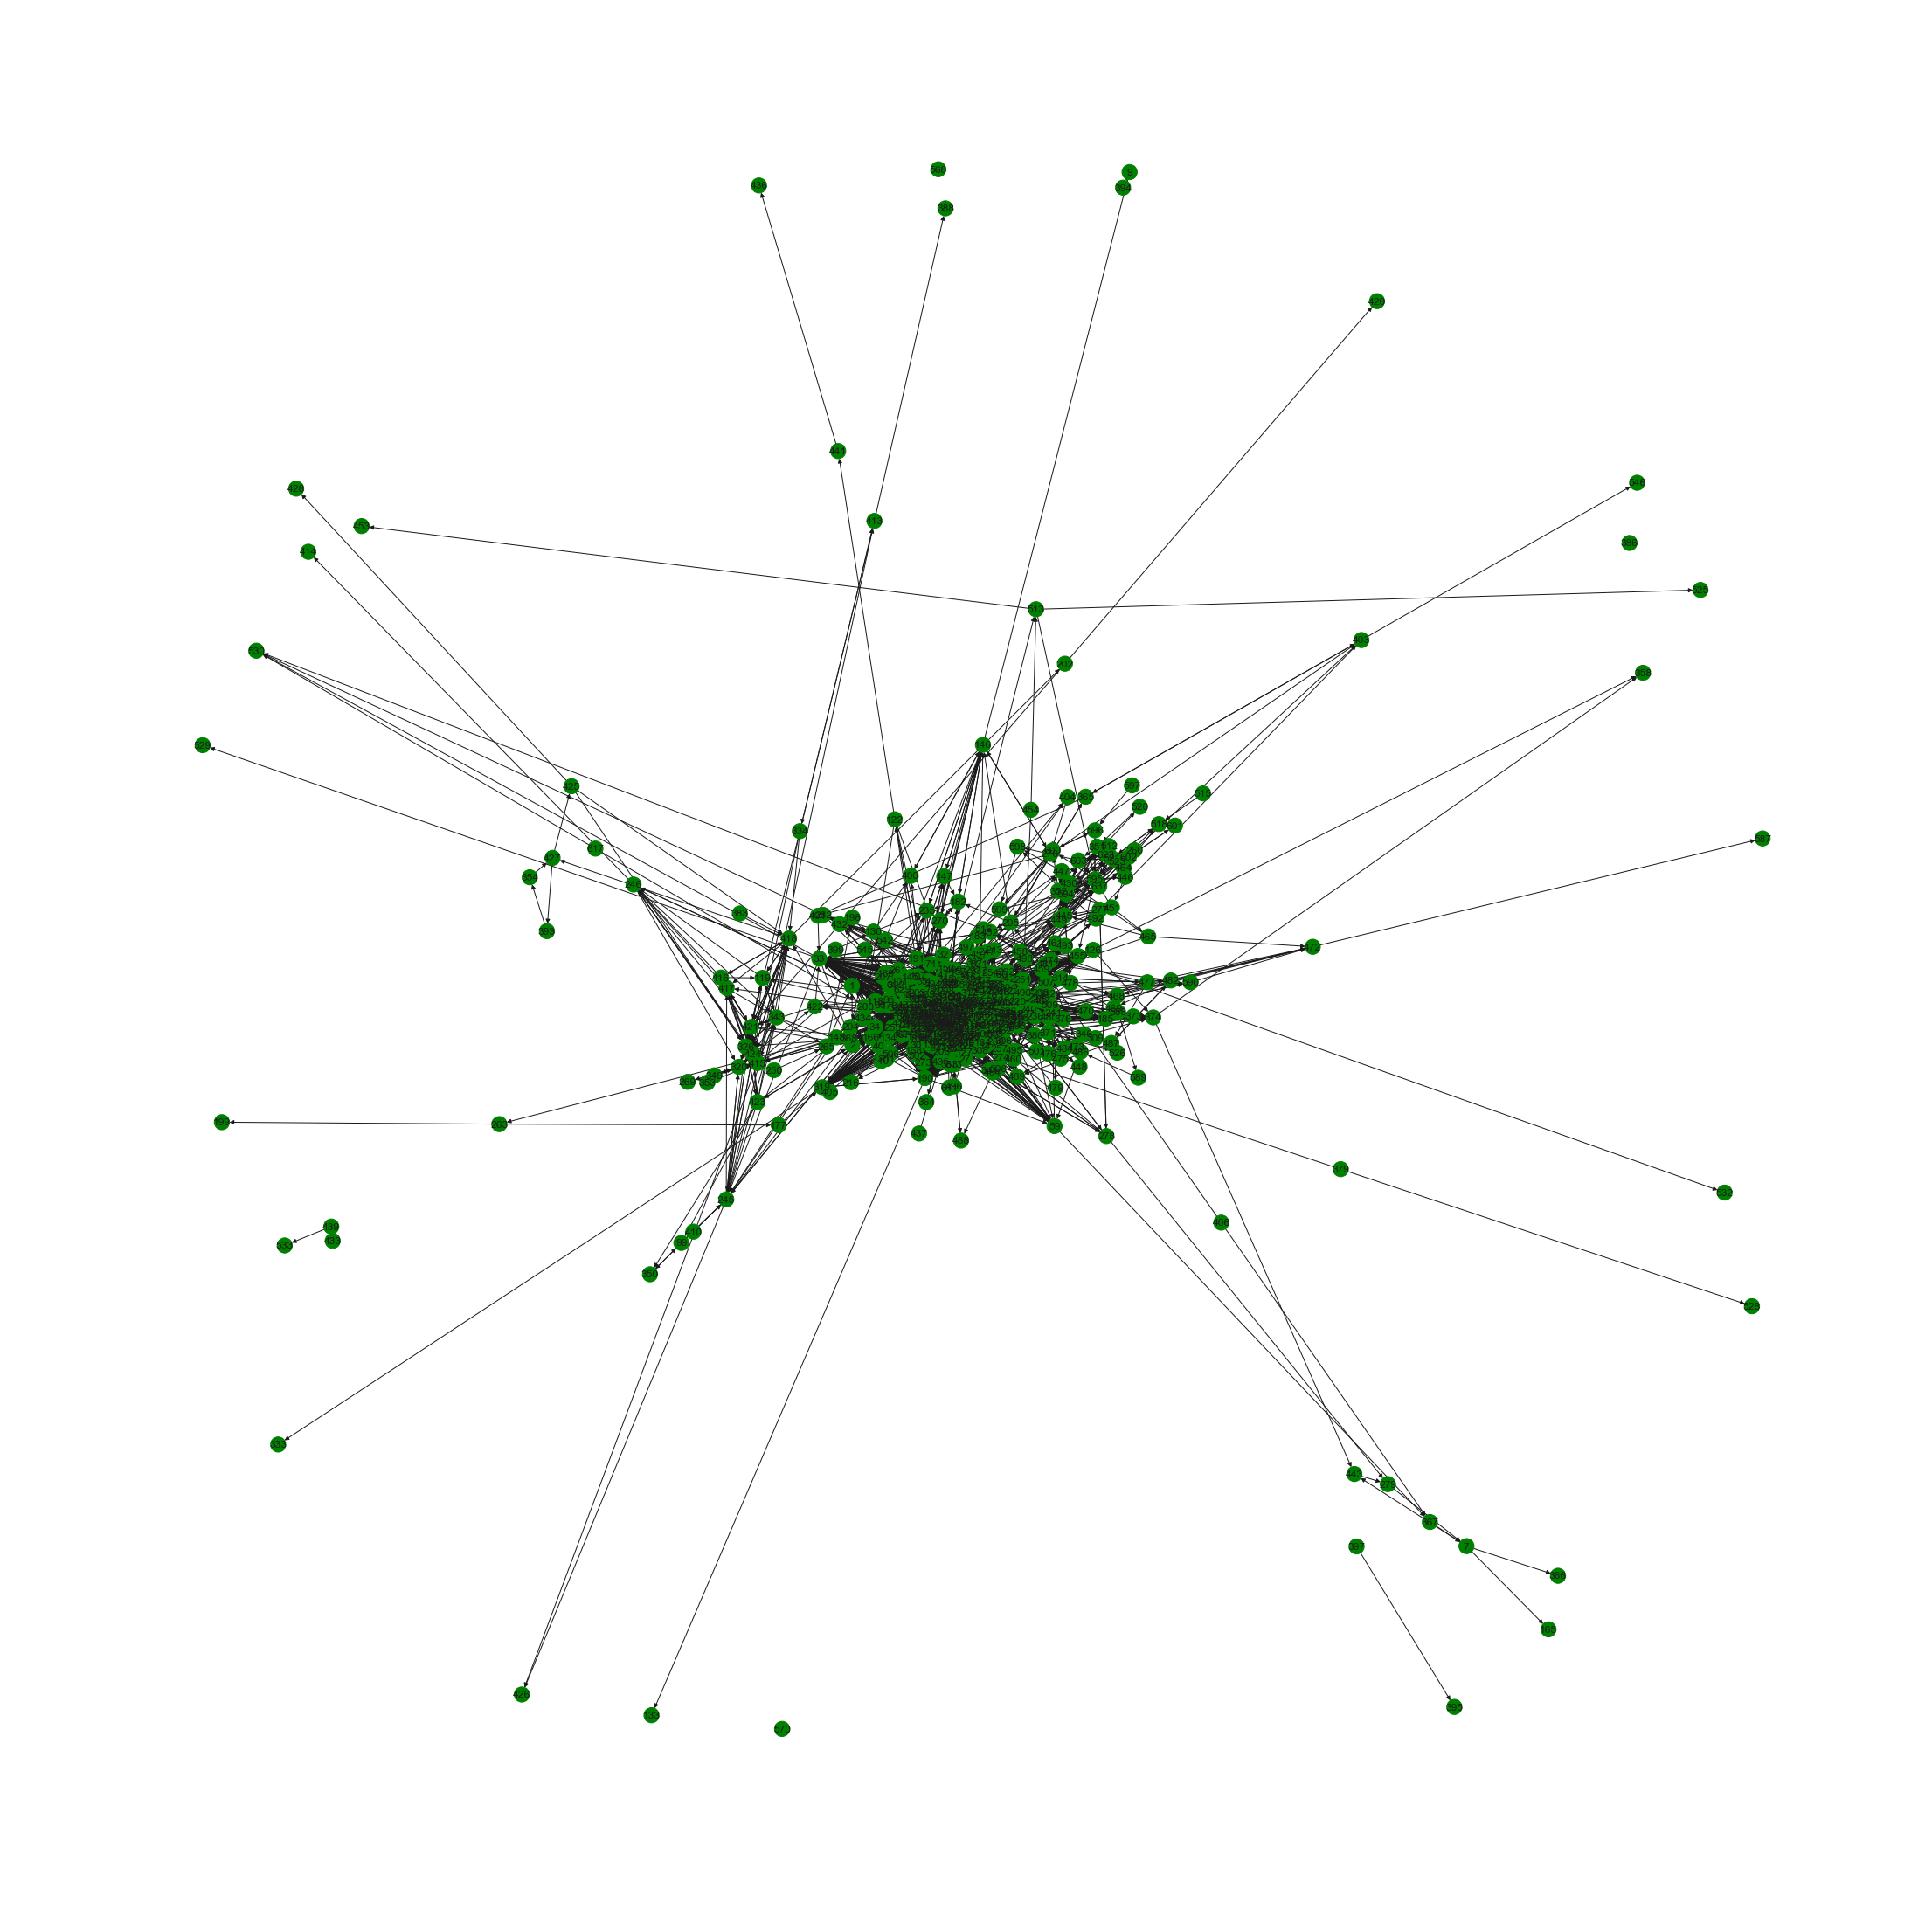

In [28]:
color_map = []
for node in unweighted_dir_graph_1:
    if node in S_min[:20]:
        color_map.append('yellow')
    else: color_map.append('green')      
nx.draw(unweighted_dir_graph_1, node_color = color_map, with_labels = True)
plt.show()